In [1]:
#importing libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#r reading the data as a dataframe
df = pd.read_csv("Model_Data.csv")

In [3]:
columns_to_drop = [ "translation", "CTR clean %","Month"]  
df = df.drop(columns=columns_to_drop, errors='ignore')

In [4]:
# Convert to datetime
df['Sent_Date'] = pd.to_datetime(df['Sent_Date'], errors='coerce')

# Create a Month column (numeric)
df['Month'] = df['Sent_Date'].dt.month

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sent_Date          1279 non-null   datetime64[ns]
 1   Day_of_week        1279 non-null   object        
 2   Category_name      1279 non-null   object        
 3   Main_Vs_REM        1279 non-null   object        
 4   Subject            1279 non-null   object        
 5   Sendings           1279 non-null   int64         
 6   OR                 1279 non-null   float64       
 7   Length_Of_subject  1279 non-null   int64         
 8   Personalization    1279 non-null   int64         
 9   Emoji              1279 non-null   int64         
 10  Urgency            1279 non-null   int64         
 11  Tone               1279 non-null   int64         
 12  Price_or_Discount  1279 non-null   int64         
 13  Imperative_Tone    1279 non-null   int64         
 14  Product 

In [6]:
categorical_columns = [
    'Day_of_week',
    'Category_name',
    'Main_Vs_REM',
    'Personalization',
    'Emoji',
    'Urgency',
    'Tone',
    'Price_or_Discount',
    'Imperative_Tone ',
    'Product',
    'Length_Of_subject',
    'Month',
    "Subject"
]

for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df = df.sort_values("Sent_Date").reset_index(drop=True)

In [9]:
formula = (
    "OR ~ C(Day_of_week) + C(Category_name) + C(Main_Vs_REM) + "
    "C(Personalization) + C(Emoji) + C(Urgency) + C(Tone) + "
    "C(Price_or_Discount) + C(Imperative_Tone) + C(Product) + "
    "C(Length_Of_subject) + C(Month) + Letter_Count + Sendings "
)

In [10]:
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
)


print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")

Train size: 1023, Test size: 256


In [11]:
import statsmodels.formula.api as smf

model = smf.mixedlm(
    formula=formula,
    data=train_df,
    groups=train_df["Subject"]
)
result = model.fit()
print(result.summary())

c:\Users\TOWER-PC\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TOWER-PC\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\TOWER-PC\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TOWER-PC\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       OR       
No. Observations:         1023          Method:                   REML     
No. Groups:               37            Scale:                    0.0008   
Min. group size:          1             Log-Likelihood:           2063.3931
Max. group size:          72            Converged:                No       
Mean group size:          27.6                                             
---------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        0.179    0.016  11.372 0.000  0.148  0.210
C(Day_of_week)[T.Monday]        -0.003    0.010  -0.266 0.790 -0.023  0.018
C(Day_of_week)[T.Saturday]      -0.011    0.007  -1.455 0.146 -0.025  0.004
C(Day_of_week)[T.Sunday]       

c:\Users\TOWER-PC\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TOWER-PC\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\TOWER-PC\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 3.787944
  warnings.warn(msg, ConvergenceWarning)
c:\Users\TOWER-PC\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
#resid = result.resid
#fitted = result.fittedvalues

# Plot residuals vs fitted
#sns.scatterplot(x=fitted, y=resid)
#plt.axhline(0, color='red', linestyle='--')
#plt.title("Residuals vs Fitted Values")
#plt.xlabel("Fitted")
#plt.ylabel("Residuals")
#plt.show()

# Residual distribution
#sns.histplot(resid, kde=True)
#plt.title("Residual Distribution")
#plt.show()


In [13]:
# 3️⃣ Generate predictions on both train and test sets
train_df["predicted"] = result.predict(train_df)
test_df["predicted"]  = result.predict(test_df)

# 4️⃣ Evaluate model performance
def evaluate_performance(true, pred, label=""):
    rmse = np.sqrt(mean_squared_error(true, pred))
    r2   = r2_score(true, pred)
    print(f"{label} RMSE: {rmse:.4f}, R²: {r2:.3f}")
    return rmse, r2

evaluate_performance(train_df["OR"], train_df["predicted"], "Train")
evaluate_performance(test_df["OR"],  test_df["predicted"],  "Test")

Train RMSE: 0.0282, R²: 0.449
Test RMSE: 0.0312, R²: 0.354


(0.03118685235758794, 0.35363960526801386)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
train_pred = result.predict(train_df)
test_pred = result.predict(test_df)

# True values
y_train = train_df["OR"]
y_test = test_df["OR"]

# Compute metrics
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    corr = np.corrcoef(y_true, y_pred)[0,1]
    bias = np.mean(y_pred - y_true)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100  # avoid division by zero
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - len(result.fe_params) - 1)
    return {
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        "R²": r2,
        "Adj R²": adj_r2,
        "Corr": corr,
        "Bias": bias
    }

train_metrics = regression_metrics(y_train, train_pred)
test_metrics = regression_metrics(y_test, test_pred)

print("Train metrics:")
for k, v in train_metrics.items():
    print(f"{k}: {v:.4f}")

print("\nTest metrics:")
for k, v in test_metrics.items():
    print(f"{k}: {v:.4f}")

Train metrics:
RMSE: 0.0282
MAE: 0.0201
MAPE (%): 17.4813
R²: 0.4487
Adj R²: 0.4321
Corr: 0.6701
Bias: -0.0006

Test metrics:
RMSE: 0.0312
MAE: 0.0223
MAPE (%): 19.9967
R²: 0.3536
Adj R²: 0.2675
Corr: 0.5978
Bias: -0.0000


In [15]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# 1️⃣ Temporal split (95% train, 5% test)
split_date = df["Sent_Date"].quantile(0.95)

train_df = df[df["Sent_Date"] <= split_date].copy()
test_df  = df[df["Sent_Date"] > split_date].copy()







In [16]:
train_df = train_df.groupby("Subject").filter(lambda g: len(g) > 1)


C:\Users\TOWER-PC\AppData\Local\Temp\ipykernel_3052\3156646944.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df = train_df.groupby("Subject").filter(lambda g: len(g) > 1)


In [17]:
train_df["Subject"].value_counts().min()

0

In [18]:
train_df["Subject"].isna().sum()

0

In [19]:
print("NaNs in Subject:", train_df["Subject"].isna().sum())
print("Unique Subjects in train:", train_df["Subject"].nunique())
print("Min group size (nonzero only):", train_df["Subject"].value_counts().min())
print(train_df["Subject"].value_counts().head())


NaNs in Subject: 0
Unique Subjects in train: 28
Min group size (nonzero only): 0
Subject
Otroligt ✨ 3 XXL-format för 249 kr styck               84
Dekorativ inredning för hemmet till de bästa priset    83
Premiumtryck upp till 78% rabatt!                      83
Personlig väggdekoration till fantastiska priser!      82
✨ 3 Canvastavlor | 2 dagar | Upp till 54% rabatt!      73
Name: count, dtype: int64


In [20]:
model = smf.mixedlm(
    formula=formula,
    data=train_df,
    groups=train_df["Subject"]
)
result = model.fit()
print(result.summary())

c:\Users\TOWER-PC\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TOWER-PC\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       OR       
No. Observations:         1210          Method:                   REML     
No. Groups:               28            Scale:                    0.0008   
Min. group size:          2             Log-Likelihood:           2430.6062
Max. group size:          84            Converged:                Yes      
Mean group size:          43.2                                             
---------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        0.169    0.017   9.809 0.000  0.135  0.202
C(Day_of_week)[T.Monday]        -0.005    0.009  -0.543 0.587 -0.023  0.013
C(Day_of_week)[T.Saturday]      -0.014    0.007  -1.849 0.064 -0.028  0.001
C(Day_of_week)[T.Sunday]       

c:\Users\TOWER-PC\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [21]:
# 3️⃣ Generate predictions on both train and test sets
train_df["predicted"] = result.predict(train_df)
test_df["predicted"]  = result.predict(test_df)

# 4️⃣ Evaluate model performance
def evaluate_performance(true, pred, label=""):
    rmse = np.sqrt(mean_squared_error(true, pred))
    r2   = r2_score(true, pred)
    print(f"{label} RMSE: {rmse:.4f}, R²: {r2:.3f}")
    return rmse, r2

evaluate_performance(train_df["OR"], train_df["predicted"], "Train")
evaluate_performance(test_df["OR"],  test_df["predicted"],  "Test")

Train RMSE: 0.0290, R²: 0.417
Test RMSE: 0.0242, R²: 0.451


(0.02420632177590633, 0.45146276030373655)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
train_pred = result.predict(train_df)
test_pred = result.predict(test_df)

# True values
y_train = train_df["OR"]
y_test = test_df["OR"]

# Compute metrics
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    corr = np.corrcoef(y_true, y_pred)[0,1]
    bias = np.mean(y_pred - y_true)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100  # avoid division by zero
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - len(result.fe_params) - 1)
    return {
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        "R²": r2,
        "Adj R²": adj_r2,
        "Corr": corr,
        "Bias": bias
    }

train_metrics = regression_metrics(y_train, train_pred)
test_metrics = regression_metrics(y_test, test_pred)

print("Train metrics:")
for k, v in train_metrics.items():
    print(f"{k}: {v:.4f}")

print("\nTest metrics:")
for k, v in test_metrics.items():
    print(f"{k}: {v:.4f}")


Train metrics:
RMSE: 0.0290
MAE: 0.0204
MAPE (%): 17.7164
R²: 0.4169
Adj R²: 0.4020
Corr: 0.6460
Bias: -0.0006

Test metrics:
RMSE: 0.0242
MAE: 0.0195
MAPE (%): 21.7673
R²: 0.4515
Adj R²: -0.0794
Corr: 0.7438
Bias: 0.0088


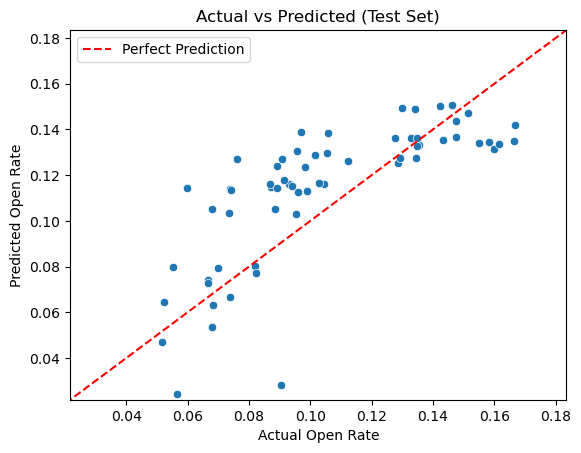

In [23]:
sns.scatterplot(x=y_test, y=test_pred)
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction')

# Dynamically set axis limits based on data
min_val = min(y_test.min(), test_pred.min()) * 0.9
max_val = max(y_test.max(), test_pred.max()) * 1.1
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

plt.xlabel("Actual Open Rate")
plt.ylabel("Predicted Open Rate")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.show()


In [24]:
import pandas as pd

def predict_open_rate(model_result, new_data):
    """
    Predict open rate (OR) using a fitted MixedLM model and new input features.

    Parameters
    ----------
    model_result : statsmodels.regression.mixed_linear_model.MixedLMResults
        The fitted mixed-effects model.
    new_data : dict or pd.DataFrame
        A dictionary (single observation) or DataFrame of new inputs.

    Returns
    -------
    predictions : np.ndarray
        Predicted open rates.
    """
    # Convert dict input to DataFrame if needed
    if isinstance(new_data, dict):
        new_data = pd.DataFrame([new_data])

    # Ensure all categorical variables are treated as categories


    # Use the trained model to predict
    preds = model_result.predict(new_data)
    return preds


In [25]:
# Example new subject line (replace with your real values)
new_subject = {
    "Day_of_week": "Saturday",
    "Category_name": "NL Final",
    "Main_Vs_REM": "MAIN",
    "Personalization": 1,
    "Emoji": 1,
    "Urgency": 1,
    "Tone": 1,
    "Price_or_Discount": 1,
    "Imperative_Tone": 1,
    "Product": 1,
    "Length_Of_subject": 0,
    "Month": 1,
    "Letter_Count": 6,
    "Sendings": 500
}

# Predict open rate
predicted_or = predict_open_rate(result, new_subject)
print(f"Predicted Open Rate: {predicted_or[0]:.3f}")


Predicted Open Rate: 0.072


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 0 to 1216
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sent_Date          1210 non-null   datetime64[ns]
 1   Day_of_week        1210 non-null   category      
 2   Category_name      1210 non-null   category      
 3   Main_Vs_REM        1210 non-null   category      
 4   Subject            1210 non-null   category      
 5   Sendings           1210 non-null   int64         
 6   OR                 1210 non-null   float64       
 7   Length_Of_subject  1210 non-null   category      
 8   Personalization    1210 non-null   category      
 9   Emoji              1210 non-null   category      
 10  Urgency            1210 non-null   category      
 11  Tone               1210 non-null   category      
 12  Price_or_Discount  1210 non-null   category      
 13  Imperative_Tone    1210 non-null   category      
 14  Product      

In [27]:
import pandas as pd

def interactive_predict_open_rate(model_result, train_df):
    """
    Interactively ask the user for input values for each feature and
    predict the open rate (OR) using the trained MixedLM model.
    """

    print("\n📬 Interactive Email Open Rate Predictor")
    print("Please enter/select values for each variable:\n")

    input_data = {}

    # Loop through each column except target or group columns
    exclude_cols = ["OR", "Subject", "Sent_Date"]
    for col in train_df.columns:
        if col in exclude_cols:
            continue

        # Get unique values if categorical
        uniques = train_df[col].dropna().unique()

        # If the column is categorical (string or few unique values)
        if train_df[col].dtype == "object" or len(uniques) < 15:
            print(f"\n➡️ {col} — choose one of the following:")
            for i, val in enumerate(uniques):
                print(f"   {i+1}. {val}")
            choice = input(f"Select 1–{len(uniques)} or type your own value: ")
            try:
                choice_idx = int(choice) - 1
                if 0 <= choice_idx < len(uniques):
                    value = uniques[choice_idx]
                else:
                    value = choice
            except:
                value = choice
            input_data[col] = value

        # If numeric
        else:
            example_val = round(train_df[col].mean(), 3)
            value = input(f"\n➡️ {col} (numeric, e.g. {example_val}): ")
            try:
                value = float(value)
            except:
                value = example_val
            input_data[col] = value

    # Convert to DataFrame
    new_data = pd.DataFrame([input_data])

    # Predict using model
    pred = model_result.predict(new_data)[0]

    print("\n🎯 Predicted Open Rate (OR): {:.2%}".format(pred))
    return pred, new_data


In [29]:
import streamlit as st
import pandas as pd
import numpy as np

def run_predictor(model_result, train_df):
    st.title("📬 Email Open Rate Predictor (Mixed Effects Model)")

    st.markdown("""
    This tool predicts the **expected open rate (OR)** for a new email subject line 
    based on historical data and a trained mixed-effects model.
    """)

    # --- Prepare inputs ---
    exclude_cols = ["OR", "Subject", "Sent_Date"]
    input_data = {}

    st.sidebar.header("Set Input Features")

    for col in train_df.columns:
        if col in exclude_cols:
            continue

        uniques = train_df[col].dropna().unique()

        # Categorical columns
        if train_df[col].dtype == "object" or len(uniques) < 15:
            choice = st.sidebar.selectbox(f"{col}", options=list(uniques))
            input_data[col] = choice

        # Numeric columns
        else:
            val = st.sidebar.number_input(
                f"{col}",
                min_value=float(train_df[col].min()),
                max_value=float(train_df[col].max()),
                value=float(train_df[col].mean())
            )
            input_data[col] = val

    # --- Predict button ---
    if st.button("🔮 Predict Open Rate"):
        new_data = pd.DataFrame([input_data])
        pred = model_result.predict(new_data)[0]
        st.success(f"### 🎯 Predicted Open Rate: **{pred:.2%}**")

        with st.expander("See input details"):
            st.write(new_data)




In [30]:
import pandas as pd
from ipywidgets import interact, Dropdown, IntSlider, FloatSlider, fixed
import ipywidgets as widgets

def interactive_open_rate_predictor(model_result, train_df):
    """
    Interactive widget to predict open rate for a new email subject line
    using a fitted MixedLM model and category options automatically derived from train_df.
    """

    # Identify categorical and numeric columns
    categorical_cols = [
        "Day_of_week", "Category_name", "Main_Vs_REM", "Personalization",
        "Emoji", "Urgency", "Tone", "Price_or_Discount", "Imperative_Tone",
        "Product", "Length_Of_subject", "Month"
    ]
    numeric_cols = ["Letter_Count", "Sendings"]

    # Automatically get unique values from training data
    cat_options = {}
    for col in categorical_cols:
        if col in train_df.columns:
            vals = sorted(train_df[col].dropna().unique().tolist())
            cat_options[col] = vals if len(vals) > 0 else ["Unknown"]

    # Define the prediction function for the interactive widget
    def _predict(
        Day_of_week,
        Category_name,
        Main_Vs_REM,
        Personalization,
        Emoji,
        Urgency,
        Tone,
        Price_or_Discount,
        Imperative_Tone,
        Product,
        Length_Of_subject,
        Month,
        Letter_Count,
        Sendings
    ):
        # Prepare input as DataFrame
        new_data = pd.DataFrame([{
            "Day_of_week": Day_of_week,
            "Category_name": Category_name,
            "Main_Vs_REM": Main_Vs_REM,
            "Personalization": Personalization,
            "Emoji": Emoji,
            "Urgency": Urgency,
            "Tone": Tone,
            "Price_or_Discount": Price_or_Discount,
            "Imperative_Tone": Imperative_Tone,
            "Product": Product,
            "Length_Of_subject": Length_Of_subject,
            "Month": Month,
            "Letter_Count": Letter_Count,
            "Sendings": Sendings
        }])

        # Cast categorical columns properly
        for col in categorical_cols:
            if col in new_data.columns:
                new_data[col] = new_data[col].astype("category")

        # Predict
        pred = model_result.predict(new_data)[0]
        print(f"\n📧 Predicted Open Rate: {pred:.3f} ({pred*100:.1f}%)")

    # Build interactive widget
    interact(
        _predict,
        Day_of_week=Dropdown(options=cat_options.get("Day_of_week", ["Monday"]), description="Day"),
        Category_name=Dropdown(options=cat_options.get("Category_name", ["Promo"]), description="Category"),
        Main_Vs_REM=Dropdown(options=cat_options.get("Main_Vs_REM", ["Main", "REM"]), description="Main/REM"),
        Personalization=Dropdown(options=cat_options.get("Personalization", [0, 1]), description="Personalization"),
        Emoji=Dropdown(options=cat_options.get("Emoji", [0, 1]), description="Emoji"),
        Urgency=Dropdown(options=cat_options.get("Urgency", [0, 1]), description="Urgency"),
        Tone=Dropdown(options=cat_options.get("Tone", [0, 1]), description="Tone"),
        Price_or_Discount=Dropdown(options=cat_options.get("Price_or_Discount", [0, 1]), description="Price/Discount"),
        Imperative_Tone=Dropdown(options=cat_options.get("Imperative_Tone", [0, 1]), description="Imperative Tone"),
        Product=Dropdown(options=cat_options.get("Product", ["Canvas"]), description="Product"),
        Length_Of_subject=Dropdown(options=cat_options.get("Length_Of_subject", ["Medium"]), description="Length"),
        Month=Dropdown(options=cat_options.get("Month", ["October"]), description="Month"),
        Letter_Count=IntSlider(
            value=int(train_df["Letter_Count"].mean() if "Letter_Count" in train_df else 40),
            min=10, max=100, step=1, description="Letter Count"
        ),
        Sendings=IntSlider(
            value=int(train_df["Sendings"].mean() if "Sendings" in train_df else 3000),
            min=100, max=10000, step=100, description="Sendings"
        )
    )


In [31]:
interactive_open_rate_predictor(result, train_df)

interactive(children=(Dropdown(description='Day', options=('Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday…